# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_stats_salary_17-18')
tes.head()

,NAME,TGT,REC,TGT/G,YDS,100+ YDS,YDS/REC,TD,LONG,FUM,...,REC_rank,TGT/G_rank,100+ YDS_rank,YDS/REC_rank,TD_rank,LONG_rank,FUM_rank,FUML_rank,overall,salary
0,Rob Gronkowski,105,69,7.5,1084,3,204.7,8,53,1,...,5.0,4.0,2.0,2.0,3.5,9.5,53.0,26.0,11.20,9000000
1,Greg Olsen,38,17,5.4,191,1,60.9,1,30,0,...,44.5,12.5,7.0,60.0,50.0,40.0,22.5,26.0,34.20,7500000
2,Travis Kelce,122,83,8.1,1038,4,177.0,8,44,0,...,1.0,1.0,1.0,11.0,3.5,16.0,22.5,26.0,8.50,9368400
3,Jimmy Graham,95,57,5.9,520,0,123.8,10,33,0,...,9.5,7.0,38.5,32.0,1.0,32.5,22.5,26.0,19.30,10000000
4,Delanie Walker,111,74,6.9,807,0,173.9,3,42,2,...,3.5,6.0,38.5,12.0,23.5,19.5,63.5,64.0,23.75,6687500


In [3]:
tes.columns

Index(['NAME', 'TGT', 'REC', 'TGT/G', 'YDS', '100+ YDS', 'YDS/REC', 'TD',
       'LONG', 'FUM', 'FUML', 'YDS_rank', 'TGT_rank', 'REC_rank', 'TGT/G_rank',
       '100+ YDS_rank', 'YDS/REC_rank', 'TD_rank', 'LONG_rank', 'FUM_rank',
       'FUML_rank', 'overall', 'salary'],
      dtype='object')

In [4]:
model = LinearRegression()

In [5]:
X = tes[['TGT', 'REC', 'TGT/G', '100+ YDS', 'YDS/REC', 'TD',
         'LONG', 'FUM', 'FUML']]
y = tes['salary']

In [6]:
X.shape

(47, 9)

In [7]:
y.shape

(47,)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)

In [10]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [11]:
np.sqrt(MSE(y, y_pred))

2289393.4843519307

In [12]:
model.intercept_

3409687.2300712187

In [13]:
model.coef_

array([  -81910.57320929,    87973.39459634,   733392.07524495,
         679791.01335636,     3536.94794958,   118866.48459898,
         -30636.18887037,   628577.10291028, -1032319.66706382])

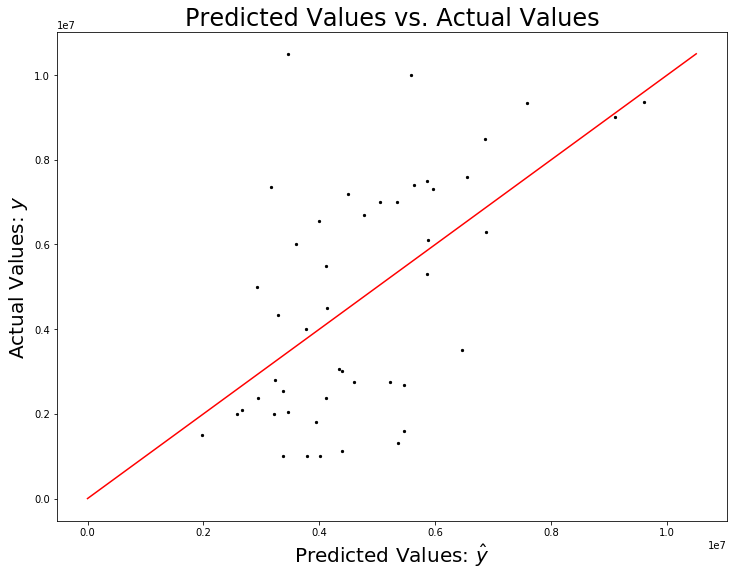

In [14]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [15]:
r2_score(y, y_pred)

0.3290773757773834